### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from generalPipeline import *

### Datasets

In [43]:
df_adapt = pd.read_csv('../../../Datasets/RQ2/vue/vue_adaptable_issues.csv')
df_consis = pd.read_csv('../../../Datasets/RQ2/vue/vue_consistent_issues.csv')
df_intention = pd.read_csv('../../../Datasets/RQ2/vue/vue_intentional_issues.csv')

In [44]:
df = process_dataframes('vue', df_adapt, df_consis, df_intention)
df.head()

d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metric)\Term Paper\Code\venv\Analysis-of-Code-Smell-and-Refactoring\Code\Analysis\RQ2\generalPipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt_of_' + JSlibraryName].iloc[0]
d:\Semester\7th Semester\SWE 4701 (Software Metr

,version_of_vue,date_of_vue,timestamp_of_vue,adaptability_total_debt_low_of_vue,adaptability_total_debt_medium_of_vue,adaptability_total_debt_high_of_vue,adaptability_total_debt_of_vue,adaptability_total_debt_difference_with_previous_version_of_vue,consistency_total_debt_low_of_vue,consistency_total_debt_medium_of_vue,consistency_total_debt_high_of_vue,consistency_total_debt_of_vue,consistency_total_debt_difference_with_previous_version_of_vue,intentionality_total_debt_low_of_vue,intentionality_total_debt_medium_of_vue,intentionality_total_debt_high_of_vue,intentionality_total_debt_of_vue,intentionality_total_debt_difference_with_previous_version_of_vue
0,v0.6.0,2013-12-07,1386462737,0,350,11705,12055,12055.0,477,10,30,517,517.0,2,242,210,454,454.0
1,v0.7.0,2013-12-23,1387855865,0,350,11705,12055,0.0,477,10,30,517,0.0,2,242,210,454,0.0
2,v0.7.1,2013-12-24,1387922313,0,350,11705,12055,0.0,477,10,30,517,0.0,2,247,205,454,0.0
3,v0.7.2,2013-12-28,1388209420,0,350,11705,12055,0.0,477,10,30,517,0.0,2,247,210,459,5.0
4,v0.10.0-rc,2014-03-19,1395263823,0,350,11705,12055,0.0,477,10,30,517,0.0,2,247,210,459,0.0


### Sum of differences 

In [48]:
def sumOfDiff(df, column_name):
    df_sum_of_diff = df[column_name].iloc[1:].sum()
    return df_sum_of_diff

In [51]:
df_adapt_sum = sumOfDiff(df, 'adaptability_total_debt_difference_with_previous_version_of_vue')
df_consis_sum = sumOfDiff(df, 'consistency_total_debt_difference_with_previous_version_of_vue')
df_intention_sum = sumOfDiff(df, 'intentionality_total_debt_difference_with_previous_version_of_vue')

In [52]:
print(df_adapt_sum)
print(df_consis_sum)
print(df_intention_sum)

14972.0
-46.0
4.0


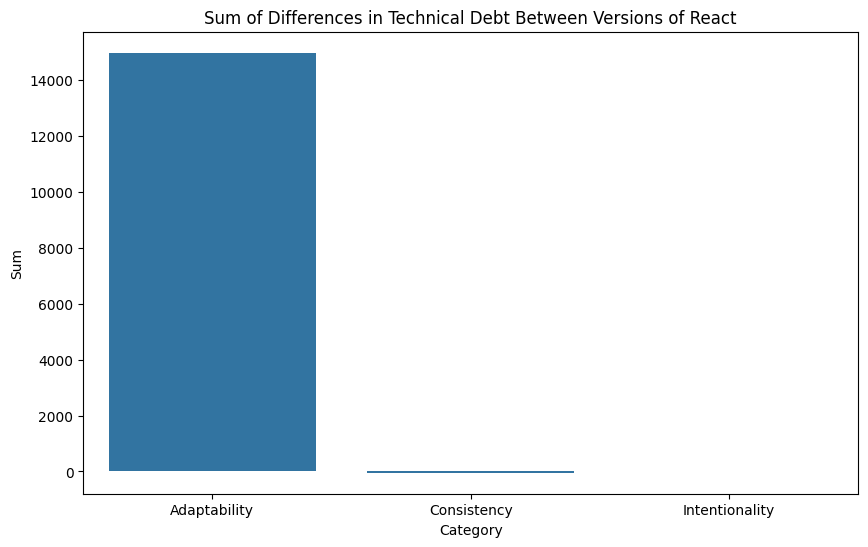

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the sums
df_sums = pd.DataFrame({
    'Category': ['Adaptability', 'Consistency', 'Intentionality'],
    'Sum': [df_adapt_sum, df_consis_sum, df_intention_sum]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sum', data=df_sums)
plt.title('Sum of Differences in Technical Debt Between Versions of React')
plt.show()

ValueError: Could not interpret value `version` for `x`. An entry with this name does not appear in `data`.

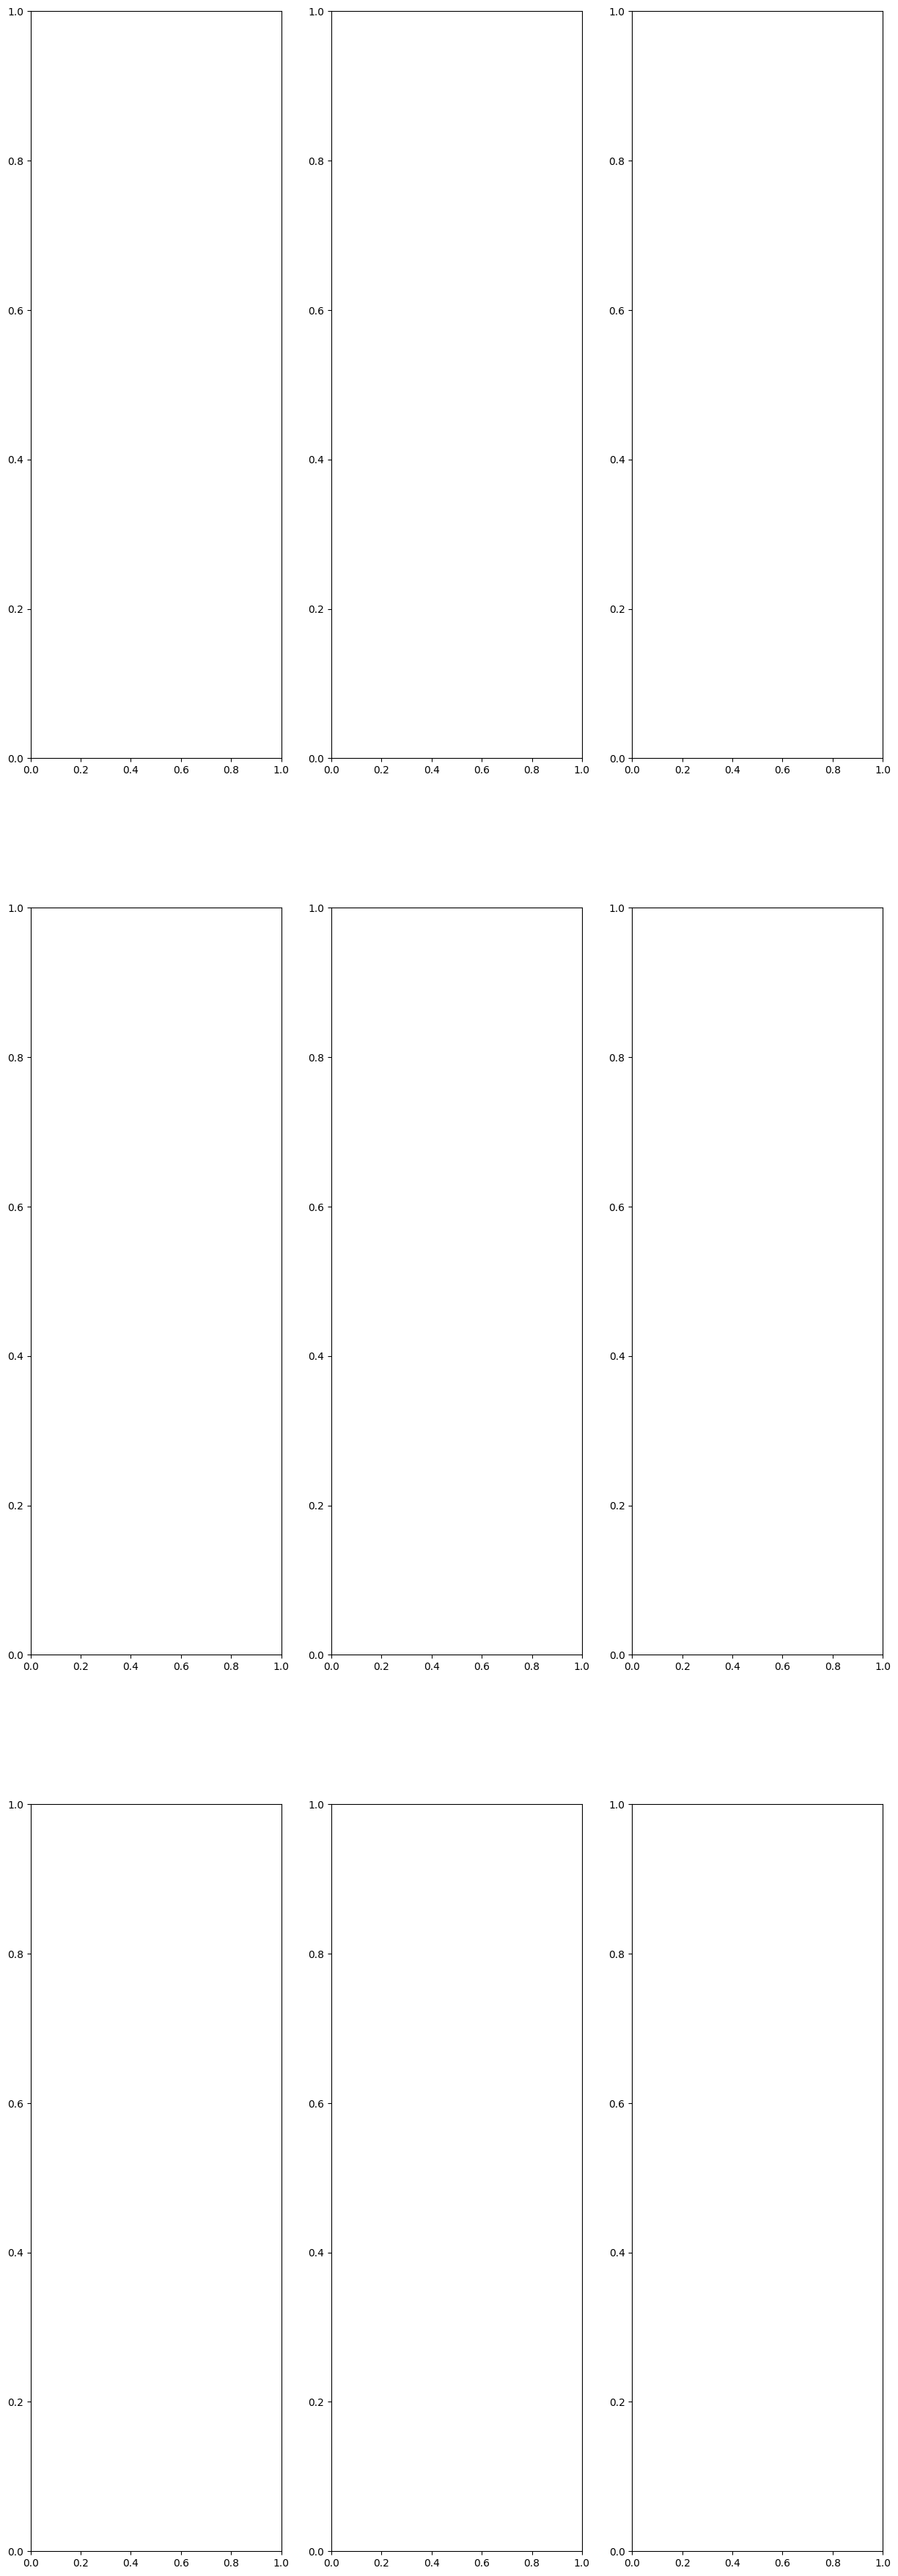

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def plot_control_charts(df, columns, version_col):
    num_plots = len(columns)
    num_rows = 3
    num_cols = 3

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15*num_rows))

    # Create line plots
    for i, col in enumerate(columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Calculate mean and standard deviation for each column
        mean = df[col].mean()
        std = df[col].std()

        # Calculate LCL and UCL for each column
        lcl = mean - 3*std
        ucl = mean + 3*std

        # Plot the data
        sns.lineplot(x=version_col, y=col, data=df, ax=axs[row, col_idx], marker ='o')
        axs[row, col_idx].axhline(lcl, color='b', linestyle='--')
        axs[row, col_idx].axhline(ucl, color='r', linestyle='--')
        axs[row, col_idx].axhline(mean, color='g', linestyle='--')
        axs[row, col_idx].set_title(col +)
        axs[row, col_idx].set_xticklabels(axs[row, col_idx].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

# Usage:
plot_control_charts(df, ['adaptability_total_debt_low_of_vue', 'adaptability_total_debt_medium_of_vue', 'adaptability_total_debt_high_of_vue', 'consistency_total_debt_low_of_vue', 'consistency_total_debt_medium_of_vue', 'consistency_total_debt_high_of_vue', 'intentionality_total_debt_low_of_vue','intentionality_total_debt_medium_of_vue', 'intentionality_total_debt_high_of_vue'], 'version')